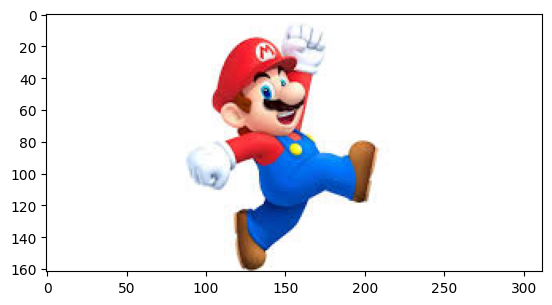

In [6]:
# Initialise the libraries 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Load the image into the environment
img = cv2.imread("images.jpeg")
#plt.imshow(img)
#plt.show()
rgb_image = cv2.imread("images.jpeg")
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

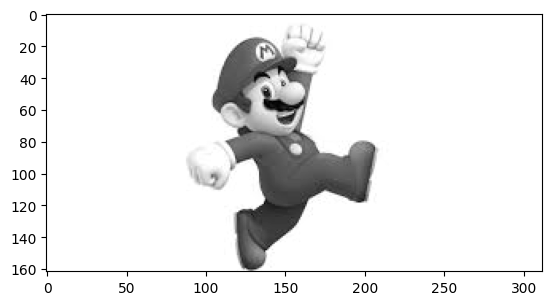

In [7]:
# Convert it into grayscale
gray_image = cv2.imread("images.jpeg",cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image,cmap="gray")
plt.show()

In [8]:
# Algorithm to get the grayscale (0-255) values by dividing the given image into a 150x150 matrix

height,width = gray_image.shape
grid_rows,grid_cols = 160,300
cell_height,cell_width = height // grid_rows , width // grid_cols
grid_values = np.zeros((grid_rows, grid_cols), dtype=int)  # Initialise the zero matrix for the grid values, which will contain the grayscale values

for row in range(grid_rows):
    for col in range(grid_cols):
        start_y, end_y = row * cell_height, (row + 1) * cell_height
        start_x, end_x = col * cell_width, (col + 1) * cell_width
        cell = rgb_image[start_y:end_y, start_x:end_x, :]  # Extract the RGB cell
        weighted_gray = (0.299 * cell[:, :, 0] + 0.587 * cell[:, :, 1] + 0.114 * cell[:, :, 2]).mean()
        grid_values[row, col] = int(weighted_gray)  # Store the average grayscale value

# Convolution Function - calculates the convolution, required inputs are the initial matrix, the kernel (filter), stride and the padding(optional)

def convolve(input_matrix,kernel,stride,padding):
    input_padded = np.pad(input_matrix, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)
    input_height,input_width = input_matrix.shape
    kernel_height,kernel_width = kernel.shape
    output_height = (input_height - kernel_height) // stride + 1
    output_width = (input_width - kernel_width) // stride + 1
    output_matrix = np.zeros((output_height, output_width))
    for i in range(0, output_height * stride, stride):
        for j in range(0, output_width * stride, stride):
            region = input_padded[i:i + kernel_height, j:j + kernel_width]
            output_matrix[i // stride, j // stride] = np.sum(region * kernel)

    return output_matrix

# Scaler Function - Scales all the values in the output to the grayscale range, i.e. 0-255. 

def scaler(inputmatrix): 
    outputmatrix = np.zeros(inputmatrix.shape)
    max_value = np.max(inputmatrix)
    min_value = np.min(inputmatrix)
    for x in range(0,158):
        for y in range(0,298):
            scaled_value = ((inputmatrix[x,y] - min_value) / (max_value - min_value))*255
            outputmatrix[x,y] = scaled_value
    return outputmatrix

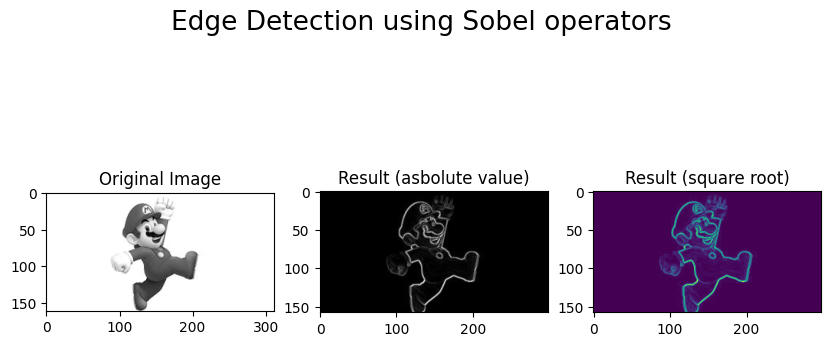

In [9]:
# Sobel Operator Implementation 

# Define the x and y filters for the operator, i.e. Gx and Gy
sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

# Apply the convolution function with stride-1 and 0 padding
convolved_x = convolve(grid_values,sobel_x,1,0)
convolved_y = convolve(grid_values,sobel_y,1,0)

# Define the sobel operator, i.e. G = Gx^2 + Gy^2
def sobel_sqroot(matrix1,matrix2): 
    output = np.zeros(matrix1.shape)
    for x in range(0,matrix1.shape[0]):
        for y in range(0,matrix2.shape[1]):
            element = (matrix1[x,y]**2 + matrix2[x,y]**2)**0.5
            output[x,y] = element
    return output

# Another form of the sobel operator (an approximation rather), i.e., |G| = |Gx| + |Gy| , below is the defined function for this form of the sobel
def sobel_mod_approx(input1,input2):
    final = np.zeros(input1.shape)
    for x in range(0,input1.shape[0]):
        for y in range(0,input2.shape[1]):
            e = abs(input1[x,y]) + abs(input2[x,y])
            final[x,y] = e
    return final

# Construct the final matrices for the edge detected image
final_matrix = sobel_sqroot(convolved_x,convolved_y)
final2 = sobel_mod_approx(convolved_x,convolved_y)

# Scale the matrices using the scaler function defined earlier to fit all the values between 0-255.
img_processed = scaler(final2)
scaled_final_matrix = scaler(final_matrix)

# Use matplotlib (subplots) to plot the results and the see the detected edges.
fig, axes = plt.subplots(1,3,figsize=(10,5))
axes[0].imshow(gray_image,cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("on")

axes[1].imshow(img_processed,cmap="gray")
axes[1].set_title("Result (asbolute value)")
axes[1].axis("on")

axes[2].imshow(scaled_final_matrix)
axes[2].set_title("Result (square root)")
axes[2].axis("on")

plt.suptitle("Edge Detection using Sobel operators",fontsize=19)
plt.show()

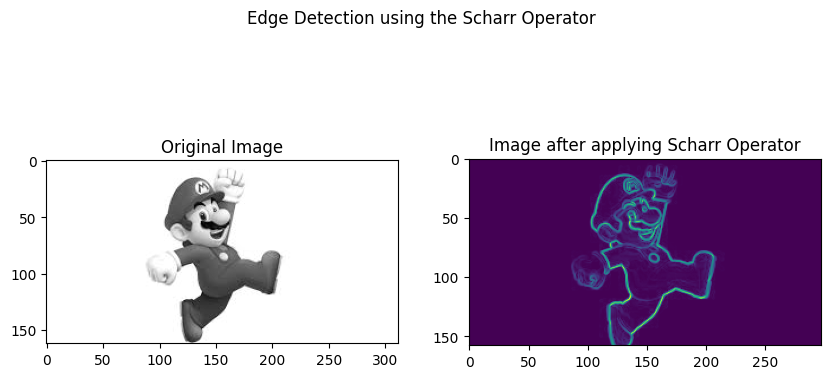

In [10]:
# Scharr Operator Implementation

# Define the x and y filters
scahrr_x = np.array([[3,0,-3],[10,0,-10],[3,0,-3]])
scahrr_y = np.array([[3,10,3],[0,0,0],[-3,-10,-3]])

# Perform the convolution
xconvolved = convolve(grid_values,scahrr_x,1,0)
yconvolved = convolve(grid_values,scahrr_y,1,0)

# Define and construct the function for the scharr operator
def scharr(matrix_1,matrix_2):
    if matrix_1.shape == matrix_2.shape:
        result = np.zeros(matrix_1.shape)
    for x in range(0,matrix_1.shape[0]):
        for y in range(0,matrix_2.shape[1]):
            adde = (matrix_1[x,y]**2 + matrix_2[x,y]**2)**0.5
            result[x,y] = adde
    return result

# Scale and process to get the final image
img = scharr(xconvolved,yconvolved)
scaledimg = scaler(img)

# Use matplotlib to visualise the image
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(gray_image,cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("on")

axes[1].imshow(scaledimg)
axes[1].set_title("Image after applying Scharr Operator")
axes[1].axis("on")

plt.suptitle("Edge Detection using the Scharr Operator")
plt.show()

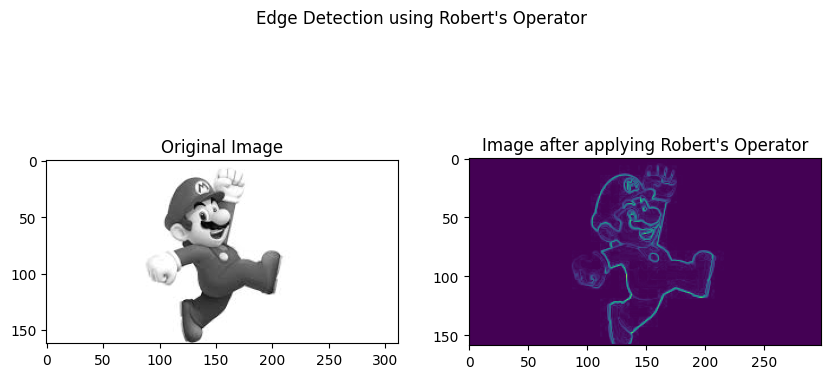

In [11]:
# Robert's Operator Implementation 

# Initialise the matrices
robert_x = np.array([[1,0],[0,-1]])
robert_y = np.array([[0,1],[-1,0]])

# Apply the convolution operations
xrbc = convolve(grid_values,robert_x,1,0)
yrbc = convolve(grid_values,robert_y,1,0)

# Define and construct the operator function
def robert(m1,m2):
    if m1.shape == m2.shape:
        robert_result = np.zeros(m1.shape) 
    for x in range(0,m1.shape[0]):
        for y in range(0,m2.shape[1]):
            added_element = (m1[x,y]**2 + m2[x,y]**2)**0.5
            robert_result[x,y] = added_element
    return robert_result

# Scale and process the final output
roberto = robert(xrbc,yrbc)
scaled_roberto = scaler(roberto)

# Visualise the result using matplotlib
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(gray_image,cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("on")

axes[1].imshow(scaled_roberto)
axes[1].set_title("Image after applying Robert's Operator")
axes[1].axis("on")

plt.suptitle("Edge Detection using Robert's Operator")
plt.show()

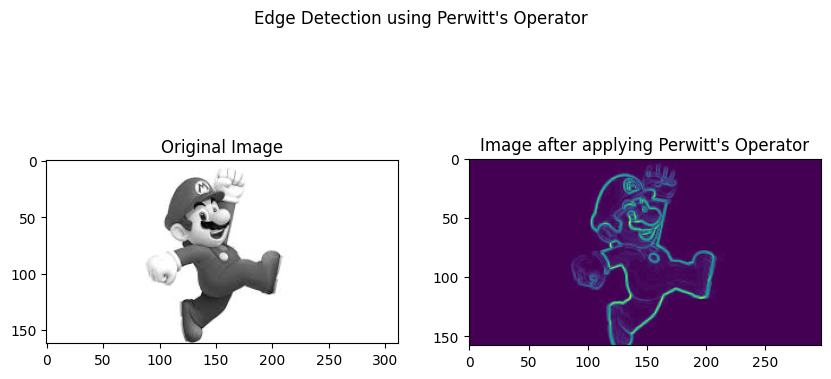

In [96]:
# Perwitt Operator

perwitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
perwitt_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

cpx = convolve(grid_values,perwitt_x,1,0)
cpy = convolve(grid_values,perwitt_y,1,0)

def perwitt(pm1,pm2):
    if pm1.shape == pm2.shape:
        o = np.zeros(pm1.shape)
    for x in range(0,pm1.shape[0]):
        for y in range(0,pm2.shape[1]):
            eelement = (pm1[x,y]**2 + pm2[x,y]**2)**0.5
            o[x,y] = eelement
    return o

perwitt_result = perwitt(cpx,cpy)
scaled_perwitt_result = scaler(perwitt_result)

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(gray_image,cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("on")

axes[1].imshow(scaled_perwitt_result)
axes[1].set_title("Image after applying Perwitt's Operator")
axes[1].axis("on")

plt.suptitle("Edge Detection using Perwitt's Operator")
plt.show()